In [2]:
%matplotlib notebook

from modsim import *

In [3]:
kg = UNITS.kilogram
m = UNITS.meter
s = UNITS.second
N = UNITS.newton
degree = UNITS.degree

In [4]:
#mass of person
mass = 62.1422 * kg

In [5]:
#constants
g = 9.81 * m/s**2
k_legs = 48000 * kg/s**2

In [6]:
#starting conditions
init = State(y = 0 * m,
             v = 3 * m/s)

In [ ]:
def update_func(state, t, system):
    y, v = state
    update(system)
    
    

In [7]:
duration = .30581039755351*2
ts = linrange (0, duration, .01)

In [8]:
system = System(init=init, g=g, ts=ts)

In [10]:
slope_func(init, 0 , system)

(<Quantity(3.0, 'meter / second')>, <Quantity(-9.81, 'meter / second ** 2')>)

In [11]:
run_odeint(system, slope_func)

In [12]:
def plot_position(results):
    newfig()
    plot(results.y, label = 'y')
    
    decorate(xlabel = 'Time (s)',
             ylabel = 'Position (m)')

<IPython.core.display.Javascript object>


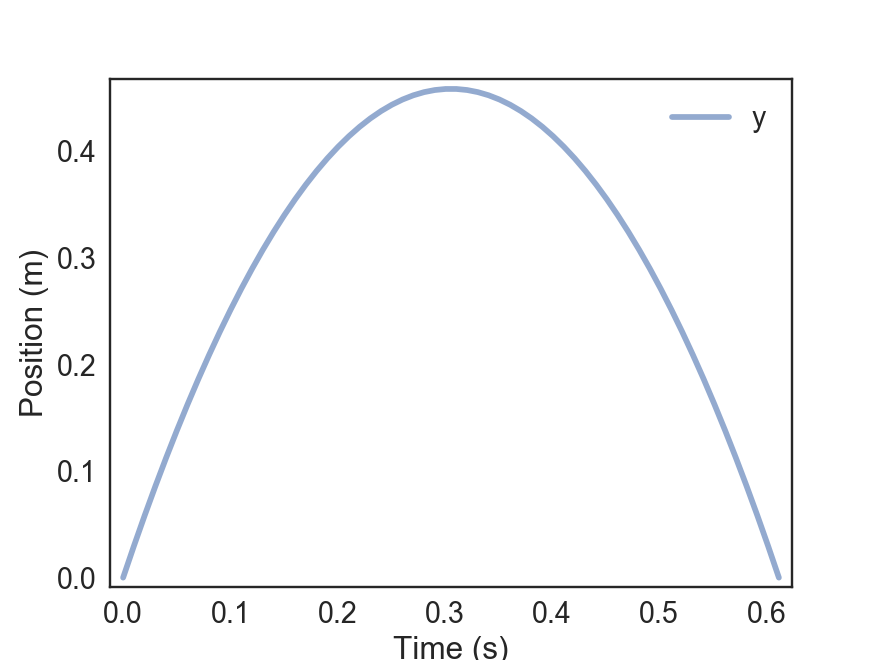

In [13]:
plot_position(system.results)

In [14]:
d = 0.45859872611464 * m

In [15]:
v_final_down = sqrt(2*g*d) #vertical velocity right before contact with trampoline
t = sqrt(2*d/g) #time to reach trampoline
p = mass * v_final_down #momentum at bottom
force_down = p/t #force applied to trampoline
tramp_displace = force_down / k_trampoline #trampoline displacement
tramp_PE = 0.5 * k_trampoline * tramp_displace**2 #elastic potential energy of trampoline

tramp_PE

<Quantity(929.0760656971511, 'kilogram * meter ** 2 / second ** 2')>

In [16]:
k = 2 * kg/s**2

In [17]:
#legs
x = .2 * m
leg_PE = 1/2 * k * x**2

In [18]:
Total_PE = tramp_PE + leg_PE

In [19]:
v_up = sqrt(2 * Total_PE / mass)

In [20]:
init_up = State(y = 0 *m,
                v = v_up)

In [21]:
duration_up = v_up/g/s + duration

In [22]:
ts_up = linrange(duration, duration_up, .01)

In [23]:
system_up = System(init=init_up, g=g, ts=ts)

In [24]:
slope_func(init_up, 0, system_up)

(<Quantity(5.468354618807692, 'meter / second')>,
 <Quantity(-9.81, 'meter / second ** 2')>)

In [25]:
run_odeint(system_up, slope_func)

<IPython.core.display.Javascript object>


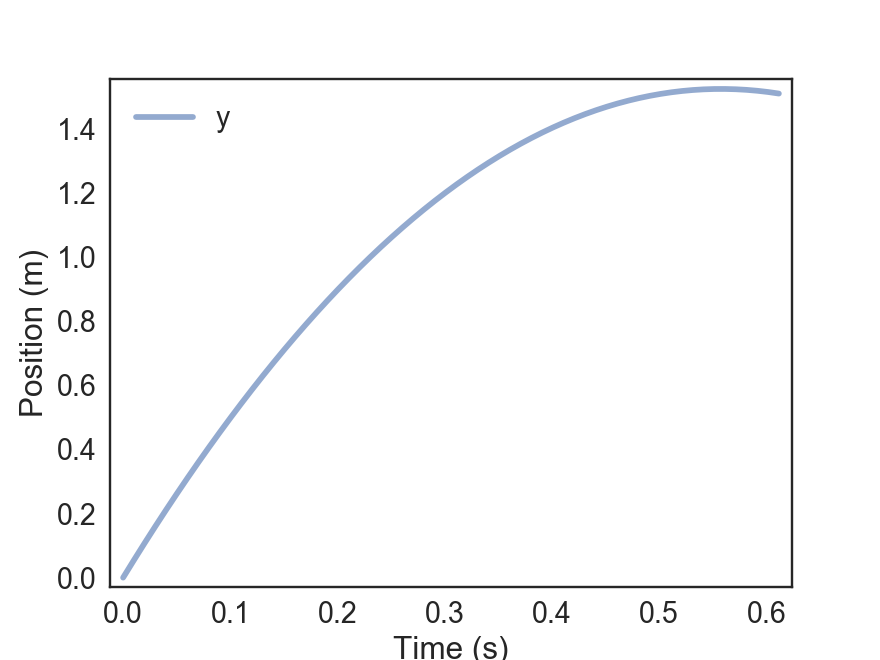

In [26]:
plot_position(system_up.results)

<IPython.core.display.Javascript object>


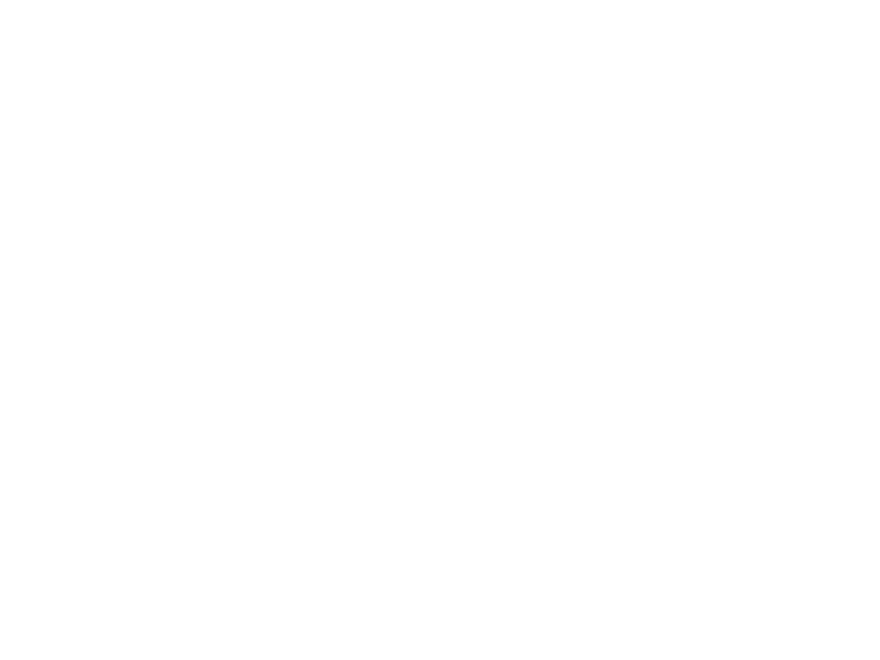

<IPython.core.display.Javascript object>


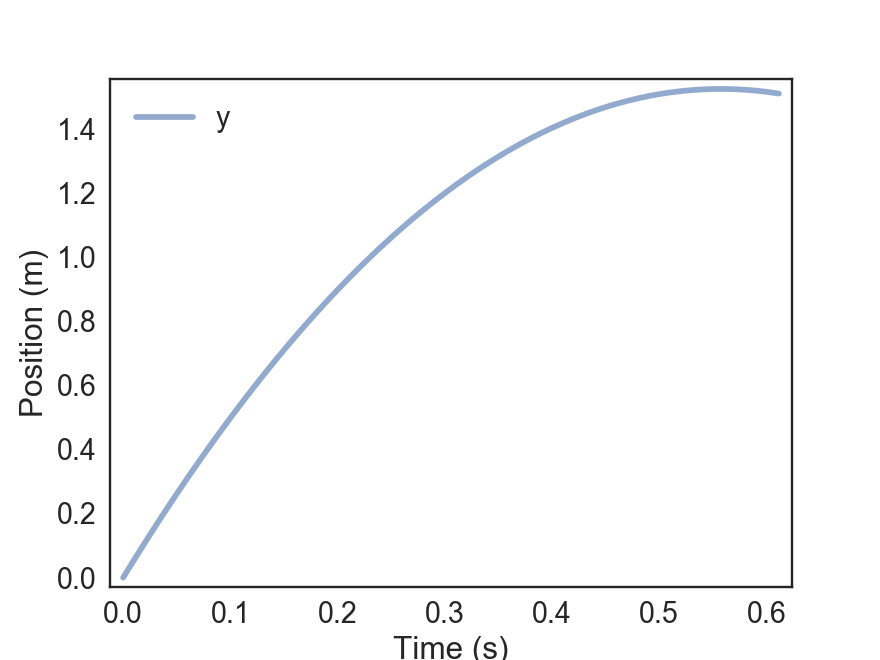

0.0 kilogram / second ** 2


<IPython.core.display.Javascript object>


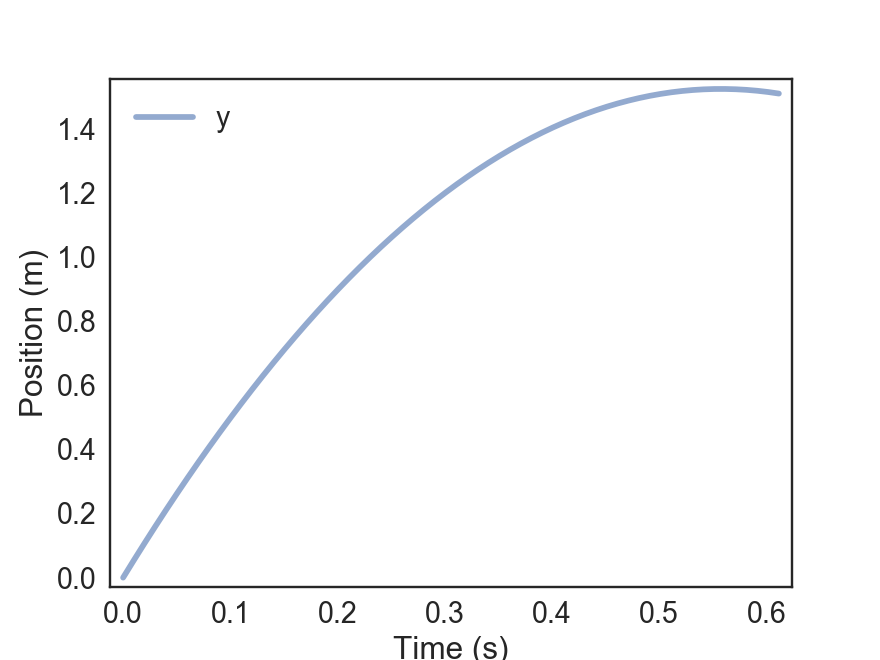

0.2222222222222222 kilogram / second ** 2


<IPython.core.display.Javascript object>


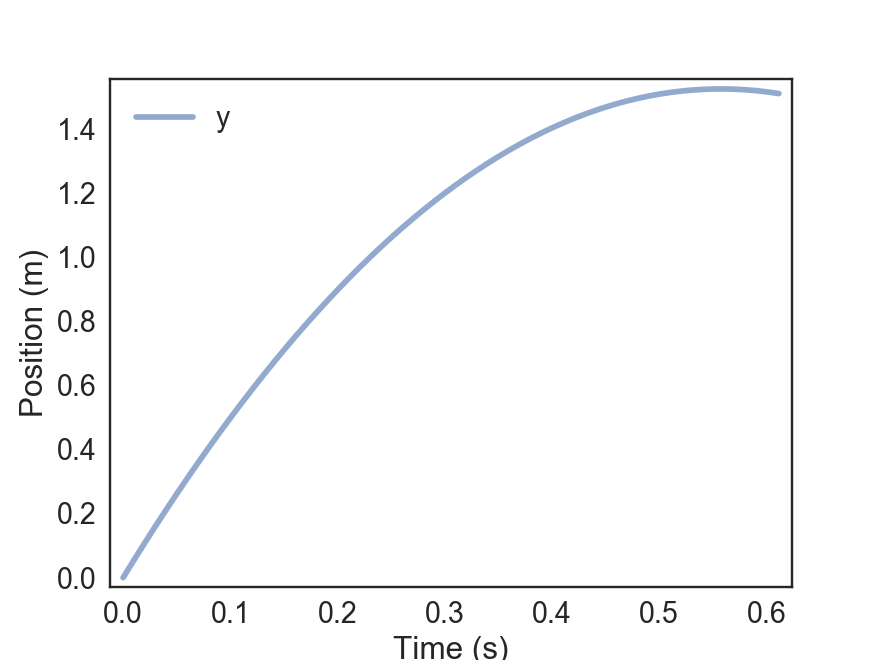

0.4444444444444444 kilogram / second ** 2


<IPython.core.display.Javascript object>


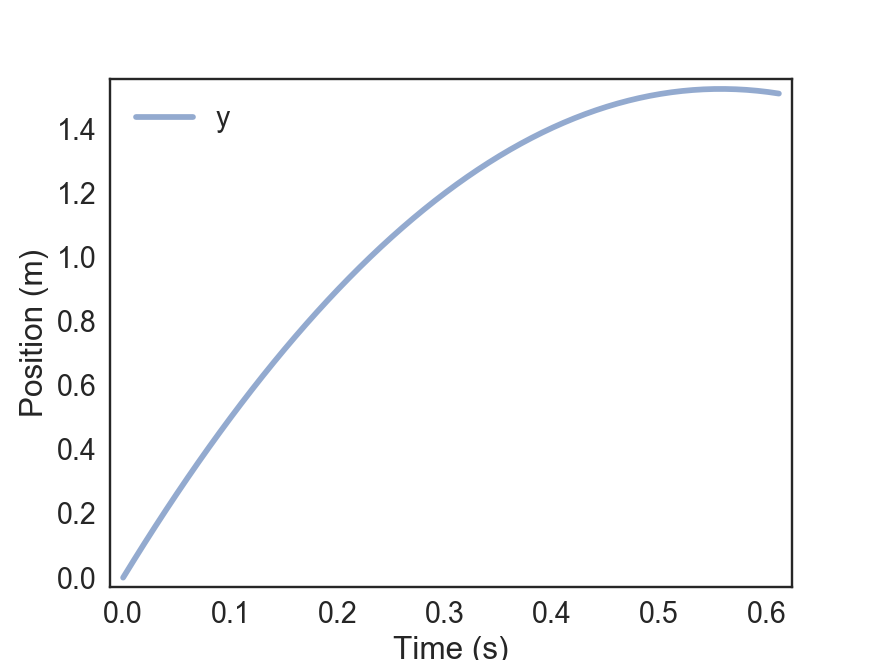

0.6666666666666666 kilogram / second ** 2


<IPython.core.display.Javascript object>


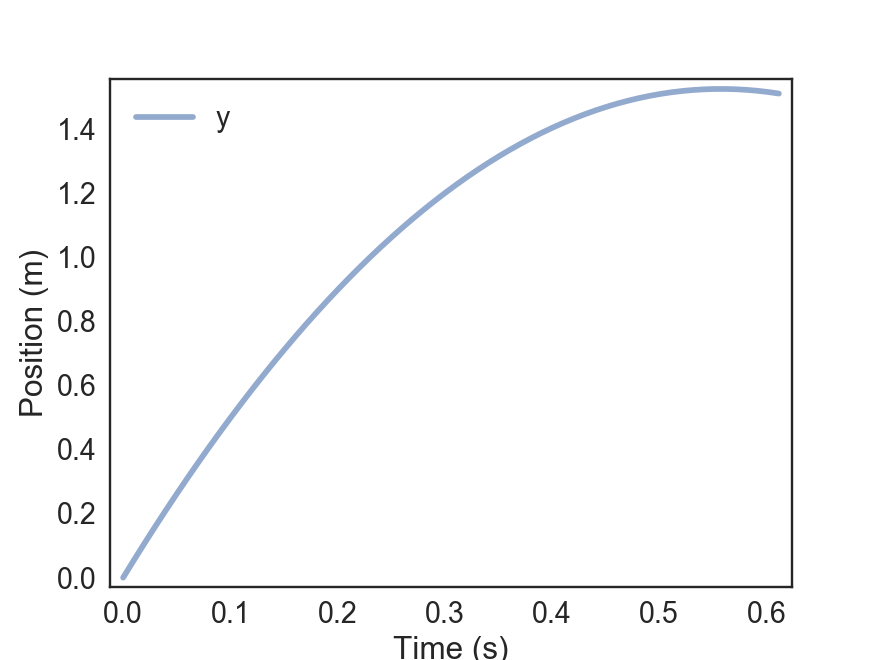

0.8888888888888888 kilogram / second ** 2


<IPython.core.display.Javascript object>


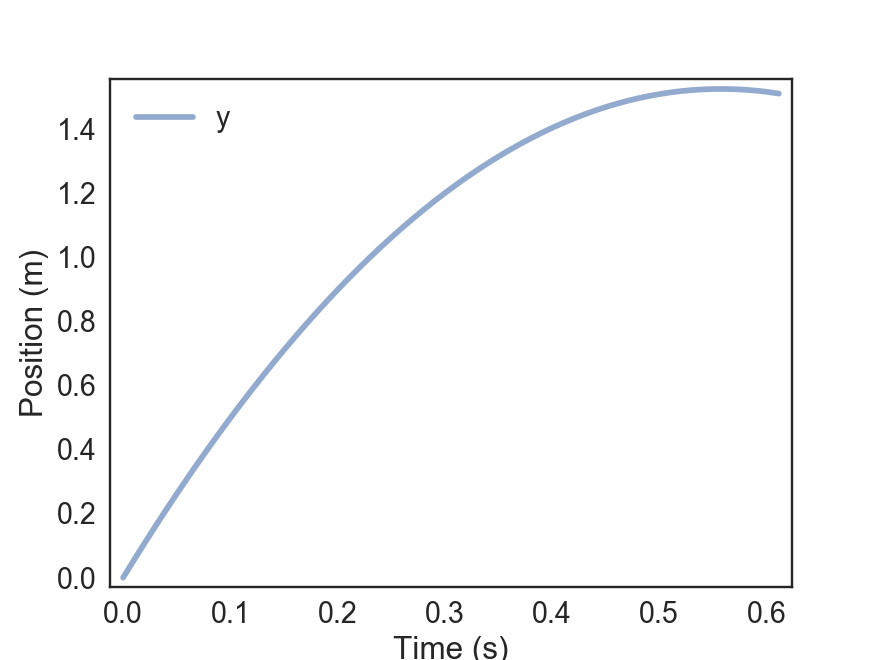

1.1111111111111112 kilogram / second ** 2


<IPython.core.display.Javascript object>


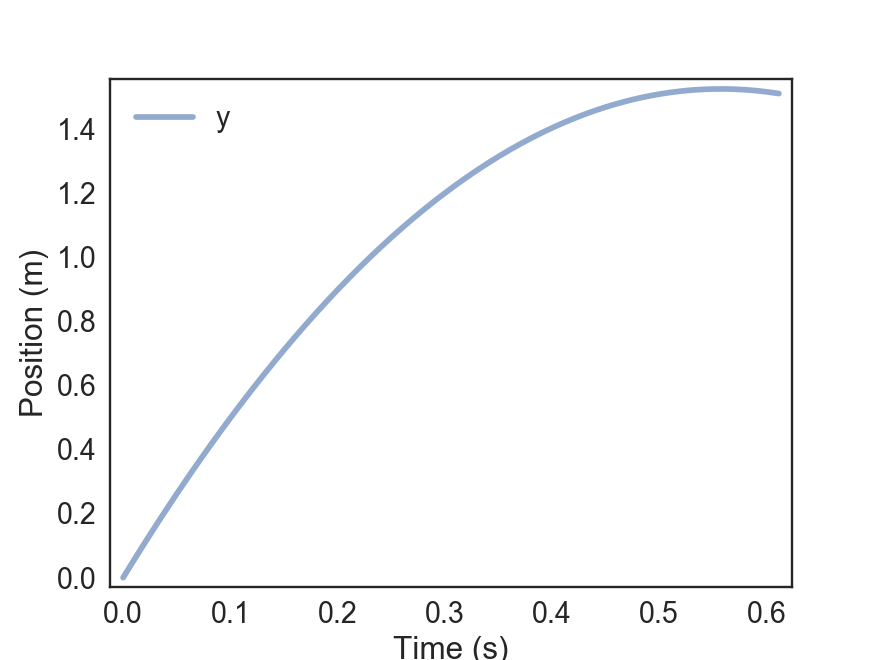

1.3333333333333333 kilogram / second ** 2


<IPython.core.display.Javascript object>


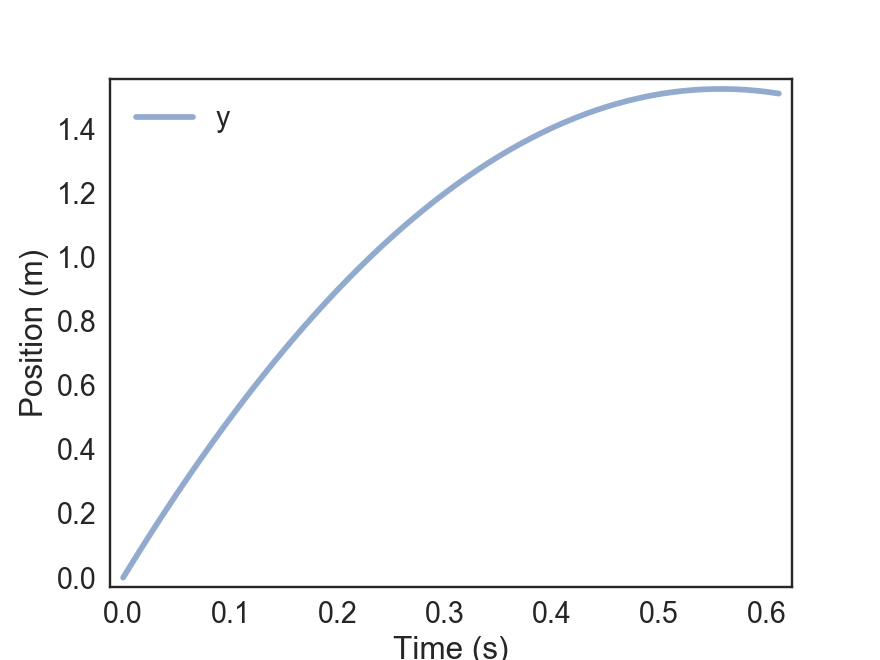

1.5555555555555554 kilogram / second ** 2


<IPython.core.display.Javascript object>


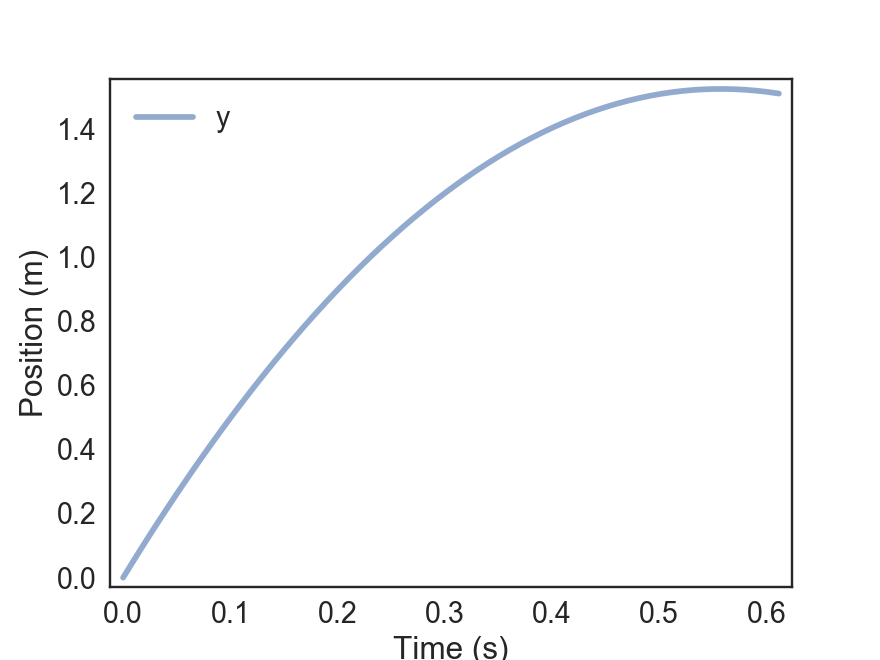

1.7777777777777777 kilogram / second ** 2


<IPython.core.display.Javascript object>


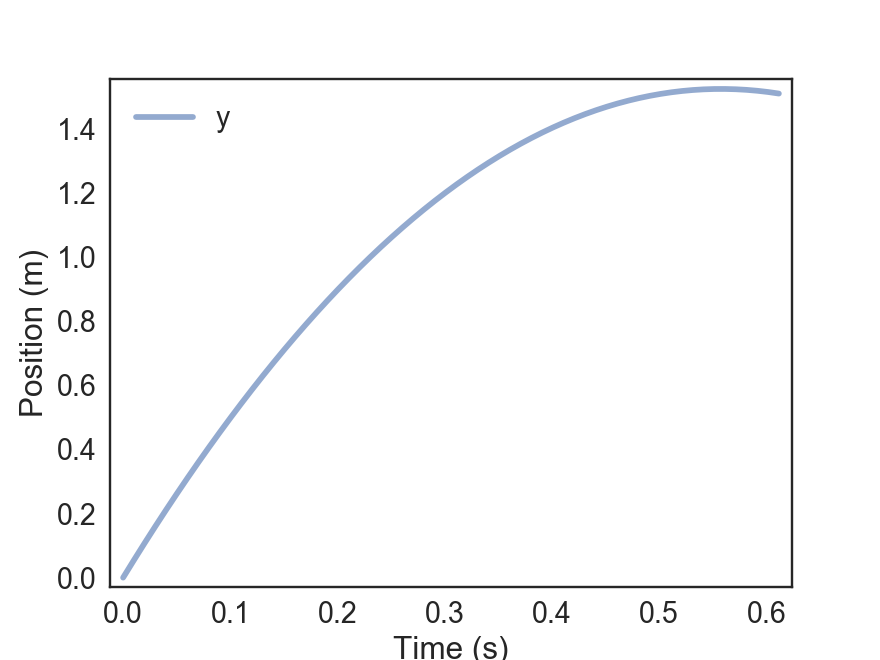

2.0 kilogram / second ** 2


In [35]:
k_values = linspace(0 * kg/s**2, 2 * kg/s**2, 10)
sweep = SweepSeries()

newfig()
for k in k_values:
    x = .2 * m
    leg_PE = 1/2 * k * x**2
    Total_PE = tramp_PE + leg_PE
    v_up = sqrt(2 * Total_PE / mass)
    init_up = State(y = 0 *m,
                    v = v_up)
    duration_up = v_up/g/s + duration
    ts_up = linrange(duration, duration_up, .01)
    system_up = System(init=init_up, g=g, ts=ts)
    slope_func(init_up, 0, system_up)
    run_odeint(system_up, slope_func)
    plot_position(system_up.results)
    print(k)

    